<a href="https://colab.research.google.com/github/karaage0703/karaage-ai-book/blob/master/ch02/02_karaage_ai_book_image_classification_tf2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# からあげ先生のAI本 M1 Mac向けTensorflow版

このノートブックはからあげ氏の書籍「人気ブロガーからあげ先生のとにかく楽しいAI自作教室」で扱われている画像分類をM1 Mac向けのTensorflowで動作させるように調整したものです。

元のノートブック、書籍の情報とサポートサイトはこちらです

- 元のノートブック: [karaage-ai-book/02_karaage_ai_book_image_classification_tf2_x.ipynb at master · karaage0703/karaage-ai-book](https://github.com/karaage0703/karaage-ai-book/blob/master/ch02/02_karaage_ai_book_image_classification_tf2_x.ipynb)
- 書籍のサポート情報（書籍情報あり）:[karaage0703/karaage-ai-book](https://github.com/karaage0703/karaage-ai-book)


## 環境作成方法

ノートブックの調整は、Google Colab向けのパッケージやコマンドインストールをのぞいています。
動作に直接必要がないものの無効化もしています。

環境作成方法を簡略ながら箇条書きで残します。

- M1 Mac向けの(macos-arm)miniforgeのインストール
- こちらの情報を参考にconda環境でtensorflow-macosのインストール
  - [TensorFlow 2.4 on Apple Silicon M1: installation under Conda environment | by Fabrice Daniel | Dec, 2020 | Towards Data Science](https://towardsdatascience.com/tensorflow-2-4-on-apple-silicon-m1-installation-under-conda-environment-ba6de962b3b8)
  - condaで仮想環境作成
  - 必要パッケージのインストール
  - tensorflow-macosのReleaseページにあるtar.gzをダウンロード
  - 情報にあるインストール方法を元に作業
- このノートブックで必須のパッケージをインストール
  - `conda install matplotlib seaborn opencv`


## ライセンス

元のノートブックのライセンスであるMIT Licenseを準拠します。

## 以下より元の解説ありノートブックです

---

# 画像分類

画像分類を実践するノートブックです。

## 教師データのダウンロード

ジャンケンの手の形の教師データをGitHubからダウンロード（Clone）します。

2,3行目はダウンロードしたデータから、使用するデータ以外の不要なファイルを削除しています。

In [46]:
!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf datasets/.git
!rm datasets/LICENSE

fatal: destination path 'datasets' already exists and is not an empty directory.
rm: datasets/LICENSE: No such file or directory


データの中身の確認

In [47]:
!ls datasets

choki gu    pa


In [48]:
!ls datasets/choki

IMG_0770.JPG IMG_0781.JPG IMG_0792.JPG IMG_0803.JPG IMG_0814.JPG IMG_0876.JPG
IMG_0771.JPG IMG_0782.JPG IMG_0793.JPG IMG_0804.JPG IMG_0815.JPG IMG_0877.JPG
IMG_0772.JPG IMG_0783.JPG IMG_0794.JPG IMG_0805.JPG IMG_0816.JPG IMG_0878.JPG
IMG_0773.JPG IMG_0784.JPG IMG_0795.JPG IMG_0806.JPG IMG_0817.JPG IMG_0879.JPG
IMG_0774.JPG IMG_0785.JPG IMG_0796.JPG IMG_0807.JPG IMG_0818.JPG IMG_0880.JPG
IMG_0775.JPG IMG_0786.JPG IMG_0797.JPG IMG_0808.JPG IMG_0870.JPG IMG_0881.JPG
IMG_0776.JPG IMG_0787.JPG IMG_0798.JPG IMG_0809.JPG IMG_0871.JPG IMG_0882.JPG
IMG_0777.JPG IMG_0788.JPG IMG_0799.JPG IMG_0810.JPG IMG_0872.JPG IMG_0883.JPG
IMG_0778.JPG IMG_0789.JPG IMG_0800.JPG IMG_0811.JPG IMG_0873.JPG IMG_0884.JPG
IMG_0779.JPG IMG_0790.JPG IMG_0801.JPG IMG_0812.JPG IMG_0874.JPG IMG_0885.JPG
IMG_0780.JPG IMG_0791.JPG IMG_0802.JPG IMG_0813.JPG IMG_0875.JPG choki_01.jpg


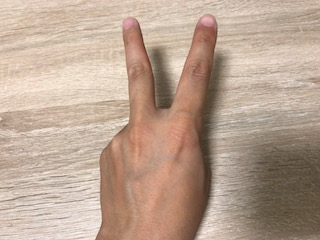

In [49]:
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage('datasets/choki/choki_01.jpg'))

## 教師データを訓練データ（Train Data）とテストデータ（Validation Data）に分割

ディレクトリの構造を可視化するための`tree`というソフトをインストールします。

In [50]:
# Google Colab向けです
#!sudo apt install tree

In [51]:
# !tree -d datasets

教師データのディレクトリと、ターゲットとなるディレクトリ（この下に訓練データのディレクトリと検証データのディレクトリが生成される）を指定します。

In [52]:
dataset_original_dir = 'datasets'
dataset_root_dir = 'target_datasets'

教師データを訓練データのディレクトリ(train)と検証データのディレクトリ（val）に分割するスクリプトをダウンロードします。

スクリプトのプログラムに関しては、本ノートブックの主題では無いので割愛します。興味ある方は以下のアドレスで、ソフトの中身を確認して下さい。

https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

In [53]:
!wget https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py

--2021-01-19 13:47:04--  https://raw.githubusercontent.com/karaage0703/karaage-ai-book/master/util/split_train_val.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2683 (2.6K) [text/plain]
Saving to: ‘split_train_val.py’

split_train_val.py  100%[===================>]   2.62K  --.-KB/s    in 0s      

2021-01-19 13:47:05 (8.28 MB/s) - ‘split_train_val.py’ saved [2683/2683]



In [54]:
import split_train_val
split_train_val.image_dir_train_val_split(
    dataset_original_dir, dataset_root_dir, train_size=0.67)

datasets/gu copy is done
datasets/choki copy is done
datasets/pa copy is done
processing is done


In [55]:
# !tree -d target_datasets

In [56]:
!ls target_datasets/train/choki

IMG_0770.JPG IMG_0781.JPG IMG_0793.JPG IMG_0808.JPG IMG_0872.JPG IMG_0882.JPG
IMG_0771.JPG IMG_0782.JPG IMG_0795.JPG IMG_0811.JPG IMG_0874.JPG IMG_0883.JPG
IMG_0773.JPG IMG_0783.JPG IMG_0798.JPG IMG_0814.JPG IMG_0875.JPG IMG_0885.JPG
IMG_0774.JPG IMG_0784.JPG IMG_0800.JPG IMG_0815.JPG IMG_0876.JPG choki_01.jpg
IMG_0775.JPG IMG_0785.JPG IMG_0802.JPG IMG_0816.JPG IMG_0877.JPG
IMG_0777.JPG IMG_0790.JPG IMG_0803.JPG IMG_0817.JPG IMG_0879.JPG
IMG_0779.JPG IMG_0791.JPG IMG_0806.JPG IMG_0818.JPG IMG_0880.JPG
IMG_0780.JPG IMG_0792.JPG IMG_0807.JPG IMG_0870.JPG IMG_0881.JPG


In [57]:
!ls target_datasets/val/choki

IMG_0772.JPG IMG_0787.JPG IMG_0796.JPG IMG_0804.JPG IMG_0812.JPG IMG_0878.JPG
IMG_0776.JPG IMG_0788.JPG IMG_0797.JPG IMG_0805.JPG IMG_0813.JPG IMG_0884.JPG
IMG_0778.JPG IMG_0789.JPG IMG_0799.JPG IMG_0809.JPG IMG_0871.JPG
IMG_0786.JPG IMG_0794.JPG IMG_0801.JPG IMG_0810.JPG IMG_0873.JPG


In [59]:
train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

## ラベルファイルの作成

学習するファイルのラベルを作成します

必要なライブラリをインポートします

In [60]:
import sys
import os
import shutil

データを保存する場所を指定します

In [61]:
backup_dir = './model'

ラベルデータを作成します（最後に表示される class numberが画像の種類の数です）

In [62]:
labels = [d for d in os.listdir(dataset_original_dir) \
    if os.path.isdir(os.path.join(dataset_original_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
  shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
  for label in labels:
    f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

class number=3


ラベルを確認します。ラベル名（choki, gu, pa）が並んでいればOKです

In [63]:
!cat ./model/labels.txt

choki
gu
pa


## 学習の事前準備

### ライブラリのインポート

必要なライブラリをインポートします

このNotebookはTensorFlow、2.x系で動作するので、TensorFlow 2.x系を選択してインポートします。

In [64]:
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.4.0-rc0


続いて、他に必要なライブラリをインストールします。

In [65]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

先ほど作成したラベルファイルから、ラベル情報を読み込みます

In [66]:
labels = []
with open(backup_dir + '/labels.txt','r') as f:
  for line in f:
    labels.append(line.rstrip())
print(labels)

NUM_CLASSES = len(labels)

['choki', 'gu', 'pa']


### 学習のハイパーパラメータの設定

学習のハイパーパラメータの設定をします

In [67]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 20
# バッチサイズ
BATCH_SIZE = 8

### データセットの前処理

データセットの前処理（変換）をします

In [68]:
IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

Found 111 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


### 前処理の確認

　イテレータを使うと、まとまったデータを順々に処理するのに便利なので、大量のデータを処理するディープラーニングではよく使われます。イテレータに関してより詳しく知りたい方は、Pythonの入門書やWebでの情報を調べてみて下さい。

ここでは、イテレータの中身を確認しておきます。イテレータの中身を確認するには next関数を使うのが簡単です。

In [69]:
(image_data,label_data) = train_data.next()
print(image_data)
print(label_data)

[[[[0.91372555 0.8235295  0.75294125]
   [0.9215687  0.8470589  0.7803922 ]
   [0.9058824  0.83921576 0.77647066]
   ...
   [0.7568628  0.6745098  0.60784316]
   [0.80392164 0.72156864 0.654902  ]
   [0.8000001  0.7137255  0.65882355]]

  [[0.86666673 0.7843138  0.70980394]
   [0.882353   0.8078432  0.7411765 ]
   [0.9176471  0.8431373  0.7843138 ]
   ...
   [0.79215693 0.7058824  0.654902  ]
   [0.76470596 0.6784314  0.62352943]
   [0.74509805 0.6627451  0.59607846]]

  [[0.8588236  0.77647066 0.70980394]
   [0.91372555 0.83921576 0.7725491 ]
   [0.94117653 0.86666673 0.8000001 ]
   ...
   [0.8078432  0.73333335 0.6784314 ]
   [0.7490196  0.6745098  0.6156863 ]
   [0.7058824  0.62352943 0.5568628 ]]

  ...

  [[0.8941177  0.82745105 0.78823537]
   [0.87843144 0.8117648  0.7725491 ]
   [0.8705883  0.80392164 0.76470596]
   ...
   [0.37254903 0.30980393 0.2509804 ]
   [0.39607847 0.34509805 0.28235295]
   [0.34509805 0.29411766 0.23137257]]

  [[0.854902   0.78823537 0.7490196 ]
   [0.8

In [70]:
print(image_data.shape)
print(label_data.shape)

(8, 64, 64, 3)
(8, 3)


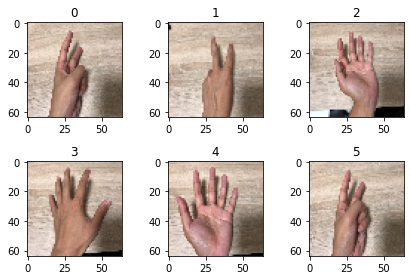

In [71]:
import matplotlib.pyplot as plt
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb // 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(image_data[i])

## AIモデル作成

ニューラルネットワーク（CNN）モデルを作成します
これは、KerasのMNISTと呼ばれる文字認識に使われるニューラルネットワークモデルをベースにしています。

MNISTは、0,1の2値ですが、RGB画像に対応できるように改造しています。具体的には、最初の層の入力サイズを `input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)`とすることで対応しています。

https://keras.io/examples/mnist_cnn/

In [72]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy', 
    metrics=['accuracy'])

モデルの概要を確認します

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 61504)            

AIモデルの学習を行います

In [74]:
%%time
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

Epoch 1/20
14/14 [==============================] - 1s 38ms/step - loss: 2.6138 - accuracy: 0.2389 - val_loss: 1.0699 - val_accuracy: 0.3036
Epoch 2/20
14/14 [==============================] - 0s 31ms/step - loss: 1.2119 - accuracy: 0.3988 - val_loss: 0.9655 - val_accuracy: 0.3393
Epoch 3/20
14/14 [==============================] - 0s 30ms/step - loss: 1.3711 - accuracy: 0.4390 - val_loss: 1.0764 - val_accuracy: 0.5536
Epoch 4/20
14/14 [==============================] - 0s 33ms/step - loss: 1.5600 - accuracy: 0.4483 - val_loss: 0.4878 - val_accuracy: 0.7857
Epoch 5/20
14/14 [==============================] - 0s 31ms/step - loss: 1.9043 - accuracy: 0.4461 - val_loss: 0.4569 - val_accuracy: 0.9107
Epoch 6/20
14/14 [==============================] - 0s 31ms/step - loss: 0.4747 - accuracy: 0.8358 - val_loss: 0.4272 - val_accuracy: 0.8393
Epoch 7/20
14/14 [==============================] - 0s 31ms/step - loss: 0.8938 - accuracy: 0.7256 - val_loss: 0.4701 - val_accuracy: 0.7679
Epoch 8/20
14

## 学習結果の可視化

lossを確認します。低いほど良い性能を示します。

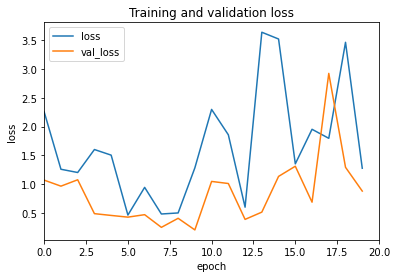

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlim([0.0, EPOCHS])
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

acc（精度）を確認します。accが訓練データでの精度で、この値が高いほど良い性能を意味します。
例えば0.5だと50%の正解率ということになります。

val_accというのが訓練に使っていないテストデータを使っての精度です。  
いわゆる、本当の精度と言われるものは、val_accの方となります。

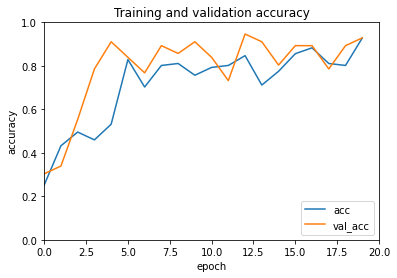

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim([0.0, EPOCHS])
plt.ylim([0.0, 1.0])
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

## 学習させたモデルを使った推定

学習させたモデルを使って、画像の推定を行います

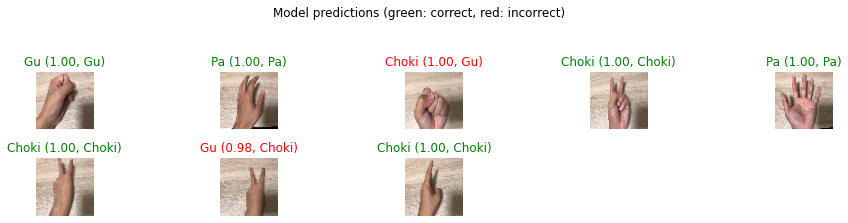

In [77]:
# Get the ordered list of class names:
import PIL.Image as Image
class_names = validation_data.class_indices.items()
class_names = np.array([key.title() for key, value in class_names])

validation_data.reset()
validation_data.shuffle = True
validation_data.batch_size = BATCH_SIZE

# Retrieve the first batch from the validation data
for validation_image_batch, validation_label_batch in validation_data:
  break

validation_id = np.argmax(validation_label_batch, axis=-1)
validation_label = class_names[validation_id]
predicted_batch = model.predict(validation_image_batch)

# Returns the indices of the maximum values along a given axis
predicted_id = np.argmax(predicted_batch, axis=-1)

# Return the maximum values along a given axis
predicted_score = np.max(predicted_batch, axis=-1)

predicted_label_batch = class_names[predicted_id]

plt.figure(figsize=(16, 9))
plt.subplots_adjust(hspace=0.5)

# Display the classification results for the first 30 images
for n in range(min(validation_image_batch.shape[0], 30)):
  plt.subplot(6, 5, n + 1)

  # Convert the range from -1 to 1 to the range from 0 to 1
  plt.imshow(np.array(validation_image_batch[n]*255,np.int32))
  color = 'green' if predicted_id[n] == validation_id[n] else 'red'
  predicted_label = predicted_label_batch[n].title()
  plt.title(predicted_label + ' ({:.2f}, {})'.format(
      predicted_score[n], validation_label[n]), color=color)
  plt.axis('off')

_ = plt.suptitle('Model predictions (green: correct, red: incorrect)')

/Users/hiroshi/miniforge3/envs/tf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


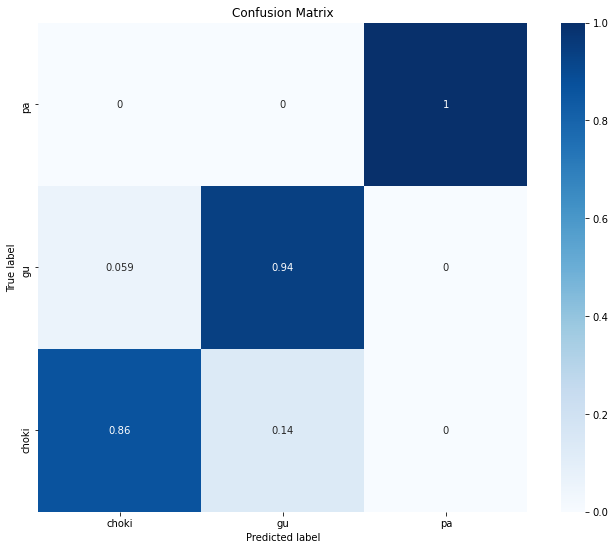

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

validation_data.reset()
validation_data.shuffle =  False
validation_data.batch_size = 1

# Retrieve the first batch from the validation data
for validation_image_batch, validation_label_batch in validation_data:
  break

predicted = model.predict_generator(validation_data, steps=validation_data.n)
predicted_classes = np.argmax(predicted, axis=-1)

# Apply normalization
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
cm = confusion_matrix(validation_data.classes, predicted_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 9))

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://matplotlib.org/users/colormaps.html
sns.heatmap(cm, annot=True, square=True, cmap=plt.cm.Blues,
            xticklabels=validation_data.class_indices,
            yticklabels=validation_data.class_indices)

plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim([0.0, 3.0])
plt.ylim([0.0, 3.0])
plt.show()

## 学習モデルの保存と読み込み


Google Colaboratory上のファイルは、自動的に消えてしまうのでファイルを保存します

In [79]:
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

In [80]:
# from google.colab import drive
# drive.mount('/content/drive')

In [81]:
!ls model

labels.txt  my_model.h5


In [82]:
# !cp './model/my_model.h5' '/content/drive/My Drive'
# !cp './model/labels.txt' '/content/drive/My Drive'

あとは、Google Drive経由でファイルをダウンロードします。

## まとめ

ここまでで、学習から推論は完了です。

発展として、以下を実施してどうなるか確認してみましょう。

- ハイパーパラメータを変更して学習の変更度合いを確認
- 教師データをジャンケン以外のものにしてみる

## 参考リンク

以下は多くを参考にした情報です。

CNN構造
- http://aidiary.hatenablog.com/entry/20161127/1480240182


データN増し
- https://github.com/bohemian916/deeplearning_tool/blob/master/increase_picture.py

GradCam
- https://github.com/shinmura0/Python-study-group/blob/master/Text3.ipynb

GradCam Confusion Matrix
- https://colab.research.google.com/drive/1mirG8BSoB3k87mh-qyY3-8-ZXj0XB6h6

TensorFlow 2.x対応
- http://tensorflow.classcat.com/2019/11/04/tf20-tutorials-images-classification/

乱数(Seed)固定
- https://scrapbox.io/nwtgck/Tensorflow+Keras%E3%81%A7%E5%86%8D%E7%8F%BE%E6%80%A7%E3%81%AE%E3%81%82%E3%82%8B%E4%B9%B1%E6%95%B0%E3%82%92%E7%94%9F%E6%88%90%E3%81%99%E3%82%8B_-_%E3%82%B7%E3%83%BC%E3%83%89%E5%9B%BA%E5%AE%9A
- https://qiita.com/okotaku/items/8d682a11d8f2370684c9


以下は、ヒントとなった情報
- http://aidiary.hatenablog.com/entry/20161212/1481549365
- https://qiita.com/yampy/items/706d44417c433e68db0d
- https://qiita.com/haru1977/items/17833e508fe07c004119
- http://hatakazu.hatenablog.com/entry/2017/06/08/045953
- https://qiita.com/Mco7777/items/2b76aba1bae35f2623ea

